**Instalando Bibliotecas**

---



---



In [ ]:
! pip install pandas

**importando as Bibliotecas necessárias.**

---



---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Lendo o arquivo e Visualizando as linhas e colunas**

---



---



---



In [ ]:
df = pd.read_csv('/content/China population.csv')

In [ ]:
df.head()

,Year,Population,% Increase in Population,Population Density,% Increase in Population Density,Urban Population,Urban Population % of Total Population,% Increase in Urban Population,Rural Population,Rural Population % of Total Population,...,Birth Rate,% Change in Birth Rate,Death Rate,% Change in Death Rate,Infant Mortality Rate,% Change in Infant Mortality Rate,Fertility Rate,% Change in Fertility Rate,Net Migration Rate,% Change in Net Migration Rate
0,1950,"54,39,79,233",0.00%,56.66,0.00%,Null,Null,Null,Null,Null,...,46.133,0.00%,23.366,0.00%,127.573,0.00%,6.488,0.00%,-0.129,0.00%
1,1951,"55,36,13,988",1.77%,57.67,1.77%,Null,Null,Null,Null,Null,...,44.921,-2.63%,23.106,-1.11%,128.008,0.34%,6.362,-1.94%,-0.116,-10.08%
2,1952,"56,49,54,522",2.05%,58.85,2.05%,Null,Null,Null,Null,Null,...,43.710,-2.70%,22.845,-1.13%,128.443,0.34%,6.236,-1.98%,-0.102,-12.07%
3,1953,"57,73,78,682",2.20%,60.14,2.20%,Null,Null,Null,Null,Null,...,42.498,-2.77%,22.585,-1.14%,128.878,0.34%,6.110,-2.02%,-0.088,-13.73%
4,1954,"58,99,36,004",2.17%,61.45,2.17%,Null,Null,Null,Null,Null,...,41.286,-2.85%,22.325,-1.15%,129.313,0.34%,5.984,-2.06%,-0.074,-15.91%


**EDA**

---


---



---


o EDA, que se traduz para análise exploratória de dados, é uma análise voltada para resumir as características principais de um conjunto de dados. Consiste na deteccao de valores nulos, outliers (que são valores que fogem da normalidade e provavelmente podem causar irregularidades nos dados adquiridos por análise ou algoritmos. Ex idade -9 ou 1001) e identificar padrões.

**Checando se há valores nulos no dataframe**

---



---



In [ ]:
if df.isnull().values.any():
    print('O Dataframe contém valores nulos')
else:
    print('O Dataframe NÃO contém valores nulos')

O Dataframe NÃO contém valores nulos


**Checando se há valores nulos em colunas específicas**

---



---

In [ ]:
if df['Urban Population'].isnull().values.any():
    print('A coluna possui valores nulos')
else:
    print('A coluna não possui valores nulos')

A coluna não possui valores nulos


**Atencão:**
*Se voltarmos 4 células, (df.head()), veremos que há valores Null na coluna Urban Population, porém esses valores possuem o tipo string e não estão sendo reconhecidos como null.*

**Para converter as strings em valores nulos**, você pode usar o método pandas.DataFrame.replace()  e, em seguida, usar o método pandas DataFrame.fillna() junto com a biblioteca **numpy** para substituir as strings por **NaN**
(NaN , Not a Number é igual a nulo em um dataframe do pandas)


In [ ]:
df['Urban Population'] = df['Urban Population'].replace('Null', np.nan)
df['Urban Population'] = df['Urban Population'].fillna(np.nan)


Agora vemos que a coluna 'Urban Population' possui campos, NaN e se validarmos haverá nulos.

In [ ]:
print(df['Urban Population'])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
68    82,97,60,595
69    84,89,82,855
70    86,68,10,508
71    88,28,94,483
72             NaN
Name: Urban Population, Length: 73, dtype: object


In [ ]:
if df['Urban Population'].isnull().values.any():
    print('A coluna possui valores nulos')
else:
    print('A coluna não possui valores nulos')

A coluna possui valores nulos


Vamos fazer o mesmo para qualquer valor nulo no dataframe.

In [ ]:
df = df.replace('Null', np.nan)
df = df.fillna(value=np.nan)

Agora sim, o Dataframe **CONTEM** valores nulos

---



---



In [ ]:
if df.isnull().values.any():
    print('O Dataframe contém valores nulos')
else:
    print('O Dataframe NÃO contém valores nulos')

O Dataframe contém valores nulos


**Validando Possíveis Outliers**

---



---


Para detectar outliers em uma coluna de um dataframe do pandas, podemos usar o método pandas.DataFrame.describe() para gerar algumas estatísticas resumidas e identificar os valores que estão muito distantes da média.

In [ ]:
df.dtypes

Year                                        int64
Population                                 object
% Increase in Population                   object
Population Density                        float64
% Increase in Population Density           object
Urban Population                           object
Urban Population % of Total Population     object
% Increase in Urban Population             object
Rural Population                           object
Rural Population % of Total Population     object
% Change in Rural Population               object
Life Expectancy                           float64
% Increase in Life Expectancy              object
Birth Rate                                float64
% Change in Birth Rate                     object
Death Rate                                float64
% Change in Death Rate                     object
Infant Mortality Rate                     float64
% Change in Infant Mortality Rate          object
Fertility Rate                            float64


In [ ]:
df.describe()

,Year,Population Density,Life Expectancy,Birth Rate,Death Rate,Infant Mortality Rate,Fertility Rate,Net Migration Rate
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.000000,108.425068,63.658904,24.311479,10.677781,59.927630,3.370904,-0.155452
std,21.217131,29.877816,11.579135,11.335668,6.012123,43.602044,1.889634,0.095815
min,1950.000000,56.660000,43.450000,10.902000,6.605000,8.696000,1.610000,-0.325000
25%,1968.000000,81.290000,55.470000,13.028000,6.699000,25.283000,1.662000,-0.245000
50%,1986.000000,112.270000,68.450000,21.908000,7.050000,43.217000,2.604000,-0.129000
75%,2004.000000,135.080000,72.540000,37.034000,12.799000,93.824000,5.614000,-0.075000
max,2022.000000,148.530000,77.300000,46.133000,23.366000,135.038000,6.488000,-0.010000


A análise do campo **year** pode ser feita visualizando o próprio resultado do describe. Podemos ver que o valor mínimo é 1950 e o valor máximo é 2022 e isso tá dentro do esperado.

Agora eu gostaria de validar se há outliers na segunda coluna, a **Population**, mas se seguirmos o exemplo da coluna anterior, parece não ser tão simples identificar. Podemos explorar um pouco mais.

Vou converter esse campo para o tipo float para possibilitar efetuarmos calculos sobre ele

In [ ]:
# Configuração para exibir números sem notação científica
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)

In [ ]:
df['Population']

0     543979233
1     553613988
2     564954522
3     577378682
4     589936004
        ...    
68   1417069468
69   1421864031
70   1424929781
71   1425893465
72   1425887337
Name: Population, Length: 73, dtype: float64

In [ ]:
min(df['Population'])

543979233.0

In [ ]:
df['Population'].quantile(0.25)

780371956.0

In [ ]:
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


In [ ]:
upper_bound

2071483843.5

In [ ]:
x = df['Year'].values.reshape(-1, 1)
y = df['Population'].values



---



---



In [ ]:
ano_pop = df[['Year','Population', 'Fertility Rate']]

ano_pop

,Year,Population,Fertility Rate
0,1950,543979233,6
1,1951,553613988,6
2,1952,564954522,6
3,1953,577378682,6
4,1954,589936004,6
...,...,...,...
68,2018,1417069468,2
69,2019,1421864031,2
70,2020,1424929781,2
71,2021,1425893465,2


In [ ]:
df_filtered = ano_pop.query('Year % 5 == 0')
df_filtered

,Year,Population,Fertility Rate
0,1950,543979233,6
5,1955,603320147,6
10,1960,654170692,6
15,1965,723846349,6
20,1970,822534450,6
25,1975,915124661,4
30,1980,982372466,3
35,1985,1060239979,3
40,1990,1153704252,2
45,1995,1218144426,2


In [ ]:
index_x = df_filtered['Year'] #estabelecendo o eixo x

In [ ]:
index_y = df_filtered['Population'] #estabelecendo o eixo y

In [ ]:
y_pos = np.arange(len(index_x))

Text(0.5, 1.0, 'Crescimento Populacional')

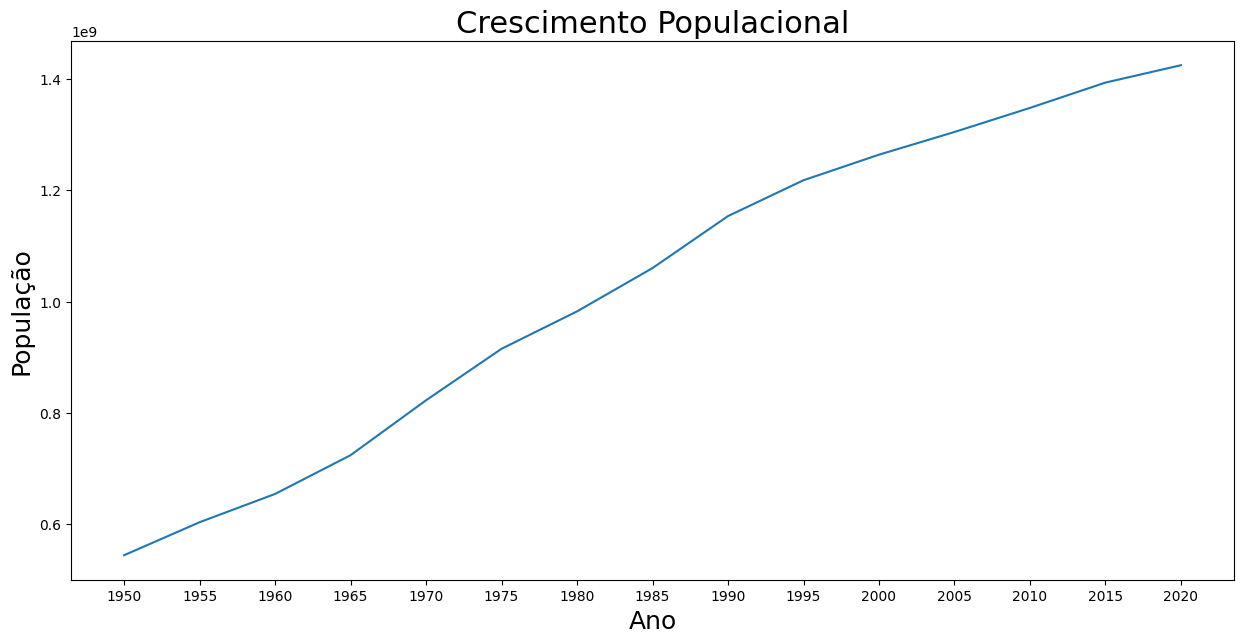

In [ ]:
plt.figure(figsize=(15,7)) #definindo tamanho do gráfico
plt.plot(y_pos, index_y) #gerando eixo rotacionado
plt.xticks(y_pos, index_x)
plt.xlabel('Ano', fontsize = 18) #label eixo x
plt.ylabel('População', fontsize = 18)  #label eixo y
plt.title('Crescimento Populacional', fontsize = 22)

In [ ]:
index_xl = df_filtered['Year'] #criando o eixo x do grafico de linhas
index_yl = df_filtered['Population'] #criando os eixos y do grafico de linahs
index_yli = df_filtered['Fertility Rate']

In [ ]:
y_pos = np.arange(len(index_xl)) #definindo o arranjo do grafico pelo eixo x

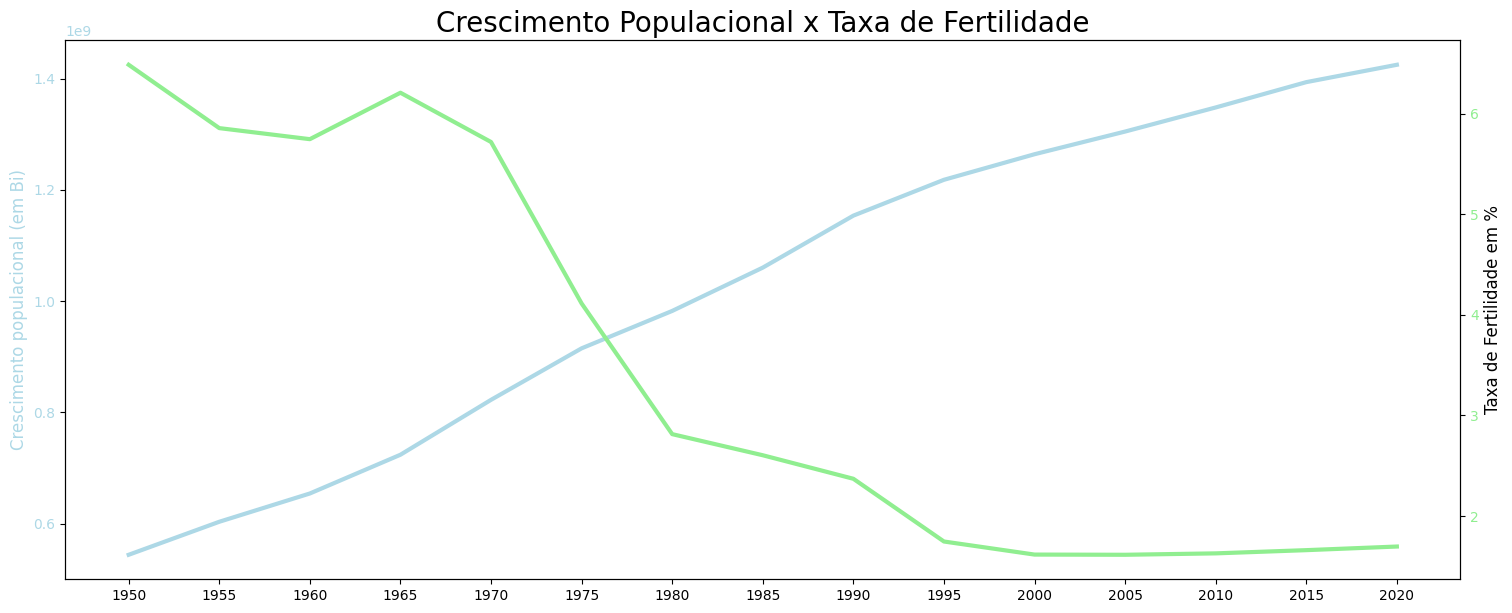

In [ ]:
plt.figure(figsize=(18,7)) #definindo tamanho do gráfico

plt.title("Crescimento Populacional x Taxa de Fertilidade", fontsize = 20)
plt.xticks(y_pos, index_xl)
plt.plot(y_pos, index_yl, color='lightblue', linewidth=3.0) # criando o eixo y com cor e espessura da linha
plt.ylabel("Crescimento populacional (em Bi)", color='lightblue', fontsize = 12) #colocando rotulo no eixo y e cor
plt.tick_params(axis ='y', labelcolor = 'lightblue')  #alterando a cor do descritivo do eixo y

ax2 = plt.twinx() #duplicando o eixo y
plt.plot(y_pos, index_yli, color='lightgreen', linewidth=3.0)
plt.ylabel("Taxa de Fertilidade em %", fontsize = 12)
plt.tick_params(axis ='y', labelcolor = 'lightgreen')